In [1]:
from linares_plot import *
import statsmodels.formula.api as smf

In [2]:
df= pd.read_excel('C:\\Users\\David\\Desktop\\IDIBAPS\\simulations_radial\\results_simulations_radial_linear.xlsx')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


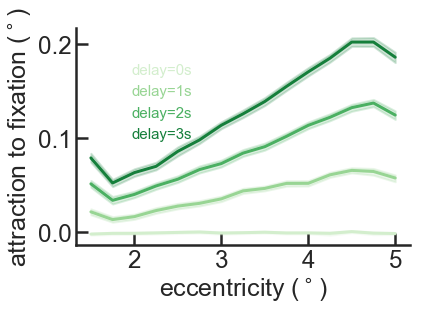

In [3]:
pal_ = sns.color_palette("Greens", n_colors=4)

sns.lineplot(x="position", y="interference", hue='delay_time', hue_order=[0, 1000, 2000, 3000],
             ci=95, palette=pal_, data=df)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              
plt.gca().spines['top'].set_visible(False)                                                                                  
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel(r'attraction to fixation ($^\circ$)', fontsize=25);
plt.xlabel(r'eccentricity ($^\circ$)', fontsize=25);
#plt.ylim(-2,12);
#plt.yticks([0,4,8,12]);
#plt.plot([60, 300], [0,0], 'k--', linewidth=1)

l =plt.legend(loc=2, frameon=False, prop={'size': 15}, ncol=1)

hue_order=['', 'delay=0s', 'delay=1s', 'delay=2s', 'delay=3s']
palette=['black', pal_[0], pal_[1], pal_[2], pal_[3]]

for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);

In [3]:
df_n= pd.read_excel('C:\\Users\\David\\Desktop\\IDIBAPS\\simulations_radial\\results_simulations_radial_linear_noiser2.xlsx')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


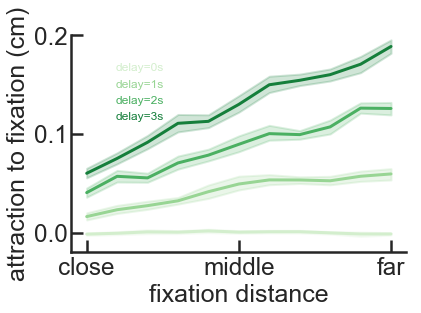

In [23]:
pal_ = sns.color_palette("Greens", n_colors=4)

sns.lineplot(x="position", y="interference", hue='delay_time', hue_order=[0, 1000, 2000, 3000],
             ci=95, palette=pal_, data=df_n)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              
plt.gca().spines['top'].set_visible(False)                                                                                  
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel(r'attraction to fixation (cm)', fontsize=25);
plt.xlabel(r'fixation distance', fontsize=25);
plt.ylim(-0.02,0.2);
plt.xticks([2, 3.25, 4.5], ['close', 'middle', 'far']);
#plt.plot([60, 300], [0,0], 'k--', linewidth=1)

l =plt.legend(loc=2, frameon=False, prop={'size': 12}, ncol=1)

hue_order=['', 'delay=0s', 'delay=1s', 'delay=2s', 'delay=3s']
palette=['black', pal_[0], pal_[1], pal_[2], pal_[3]]

for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


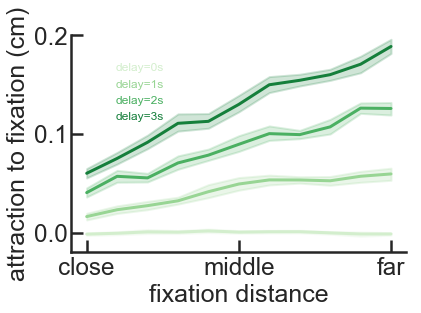

In [4]:
pal_ = sns.color_palette("Greens", n_colors=4)

sns.lineplot(x="position", y="interference", hue='delay_time', hue_order=[0, 1000, 2000, 3000],
             ci=95, palette=pal_, data=df_n)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              
plt.gca().spines['top'].set_visible(False)                                                                                  
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel(r'attraction to fixation (cm)', fontsize=25);
plt.xlabel(r'fixation distance', fontsize=25);
plt.ylim(-0.02,0.2);
plt.xticks([2, 3.25, 4.5], ['close', 'middle', 'far']);
#plt.plot([60, 300], [0,0], 'k--', linewidth=1)

l =plt.legend(loc=2, frameon=False, prop={'size': 12}, ncol=1)

hue_order=['', 'delay=0s', 'delay=1s', 'delay=2s', 'delay=3s']
palette=['black', pal_[0], pal_[1], pal_[2], pal_[3]]

for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);

In [60]:
from model_radial_linear import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


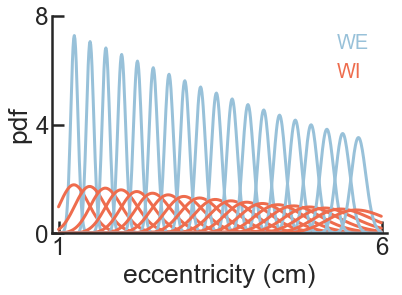

In [83]:
r1 = model_radial_linear(totalTime=3000, targ_onset=100,  presentation_period=250, position=1.5, plot_connectivity=True,
                        save_RE=True) 

In [85]:
r2 = model_radial_linear(totalTime=3000, targ_onset=100,  presentation_period=250, position=3.25, plot_connectivity=False,
                        save_RE=True) 

In [76]:
r3 = model_radial_linear(totalTime=3000, targ_onset=100,  presentation_period=250, position=5, plot_connectivity=False,
                        save_RE=True) 

In [63]:

def simulation_heatmap_rad(RE, time_simulation, position, target_onset, pres_period, rext=6, rint=1, bar_=True):
    pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
    #
    dims=np.shape(RE)
    dimN = dims[0]
    if bar_==True:
        plt.figure(figsize=(8,6))
    else:
        plt.figure(figsize=(6.4,6))
        
    ax = sns.heatmap(RE, cmap=pal_cyan, vmin=0, vmax=8,  cbar=bar_, 
                cbar_kws={"shrink": .82, 'ticks' : [0,2,4,6,8], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(20)
    ax.figure.axes[-1].tick_params(labelsize=20)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    p_stim = (position-rint) * dims[0]/(rext-rint)
    #
    stimon = target_onset/2
    stimoff = (target_onset + pres_period) / 2
    #
    plt.gca().plot([stimon, stimon+400], [p_stim, p_stim], ls='--', color ='gold', linewidth=1) 
    #
    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, int(dimN/4), int(dimN/2),  int(3*dimN/4), int(dimN) ])
    plt.gca().set_yticklabels([str(rint),'',str((rext+rint)/2), '', str(rext)], fontsize=20)
    #
    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron (cm to fixation)', fontsize=20);
    plt.gca().set_ylim(dimN+60, -45)
    ###
    ##line stims 
    s1on=stimon
    s1off=stimoff
    plt.plot([0, s1on], [-15, -15], 'k-', linewidth=2)
    plt.plot([s1on, s1on], [-15, -40], 'k-', linewidth=2)
    plt.plot([s1on, s1off], [-40, -40], 'k-', linewidth=2)
    plt.plot([s1off, s1off], [-15, -40], 'k-', linewidth=2)
    plt.plot([s1off, dims[1]], [-15, -15], 'k-', linewidth=2)
    #
    #time
    x1sec = 1000 * dims[1] / time_simulation
    plt.plot([dims[1]-x1sec, dims[1]], [dimN+30, dimN+30], 'k-', linewidth=2)
    plt.text(dims[1]-300, 600, '1s', fontsize=20);
    plt.show()

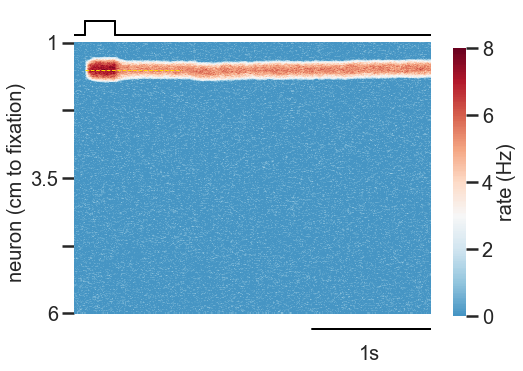

In [84]:
simulation_heatmap_rad(r1[3], time_simulation=3000, position=1.5,  target_onset=100, pres_period=250)

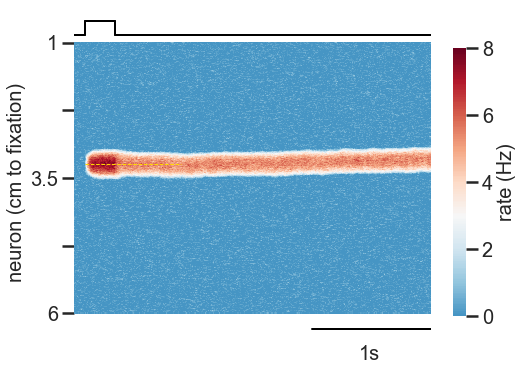

In [86]:
simulation_heatmap_rad(r2[3], time_simulation=3000, position=3.25,  target_onset=100, pres_period=250)

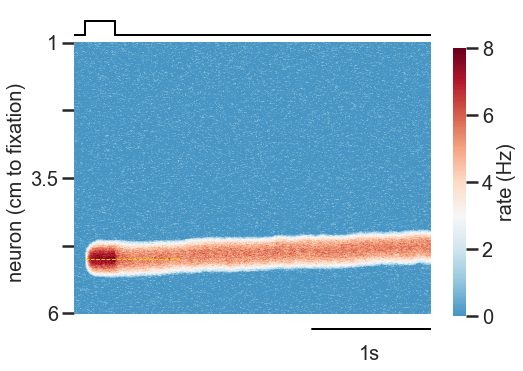

In [78]:
simulation_heatmap_rad(r3[3], time_simulation=3000, position=5,  target_onset=100, pres_period=250)

In [ ]:
N=512
rint = 1
rext = 6
tauE=9
tauI=4
I0E=0.1
I0I=0.5
GEE=0.022
GEI=0.019
GIE=0.01 
GII=0.1
NsigE=0.8
NsigI=1.7
plot_connectivity=False
plot_rate=False
save_RE=False
totalTime = 3000

st_sim =time.time()
dt=2
nsteps=int(floor(totalTime/dt));
rE=zeros((N,1));
rI=zeros((N,1));
#Connectivities
v_E=zeros((N));
v_I=zeros((N));
WE=zeros((N,N));
WI=zeros((N,N));
###    
###     
radii = np.linspace(rint, rext, N) ##all radii (linear)
#### sigmasE (taking the kappaE in radius 1 in the angular model)
ser1 = 1/float(300)
ke1=1.  
ke2=1.7     ##above 1 to be supralinear (inconsistency: the change in kappaE is lesss stepper then in kappaI)         
ke3=0.05             
SE = ke1*ser1*radii**ke2 + ke3 ##all sigmasE (supralinear increase)
#### sigmasI (taking the kappaI in radius 1 in the angular model) (alth¡hough I had to add the constant to correct)
sir1 = 1/float(30) 
ki1=0.5
ki2= 1.6  ##above 1 to be supralinear
ki3=0.2
SI = ki1*sir1*radii**ki2 + ki3 ##all sigmasI (supralinear increase)
###
### connectivity profile for E and I in the radial dimension
for j in range(0, N): #para cada distancia hay una sigma diferente
    for i in range(0, N): #dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
        v_E[i]= 1/(sqrt(2*pi)*SE[j])*e**(-((radii[i]- radii[j])**2)/(2*(SE[j]**2)))
        v_I[i]= 1/(sqrt(2*pi)*SI[j])*e**(-((radii[i]- radii[j])**2)/(2*(SI[j]**2)))
    ####
    WE[:,j]=v_E;
    WI[:,j]=v_I;

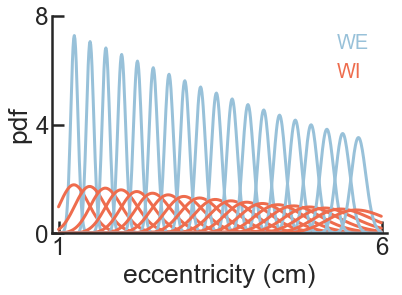

In [90]:
p_cols=['#98c1d9', '#ee6c4d' ]
for con_w in [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]:
    plt.plot(WE[con_w, :], p_cols[0])
    plt.plot(WI[con_w, :], p_cols[1])
plt.xlabel('eccentricity (cm)')
plt.ylabel('pdf')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.plot(WE[475, :], p_cols[0], label='WE')
plt.plot(WI[475, :], p_cols[1], label='WI')
plt.ylim(0,8)
plt.yticks([0,4,8])
plt.xlim(-10, 520)
plt.xticks([0, int(512/2), 512], [str(rint), '', str(rext)])
l = plt.legend(loc=1, frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(['WE', 'WI']):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(p_cols[i_h]);

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


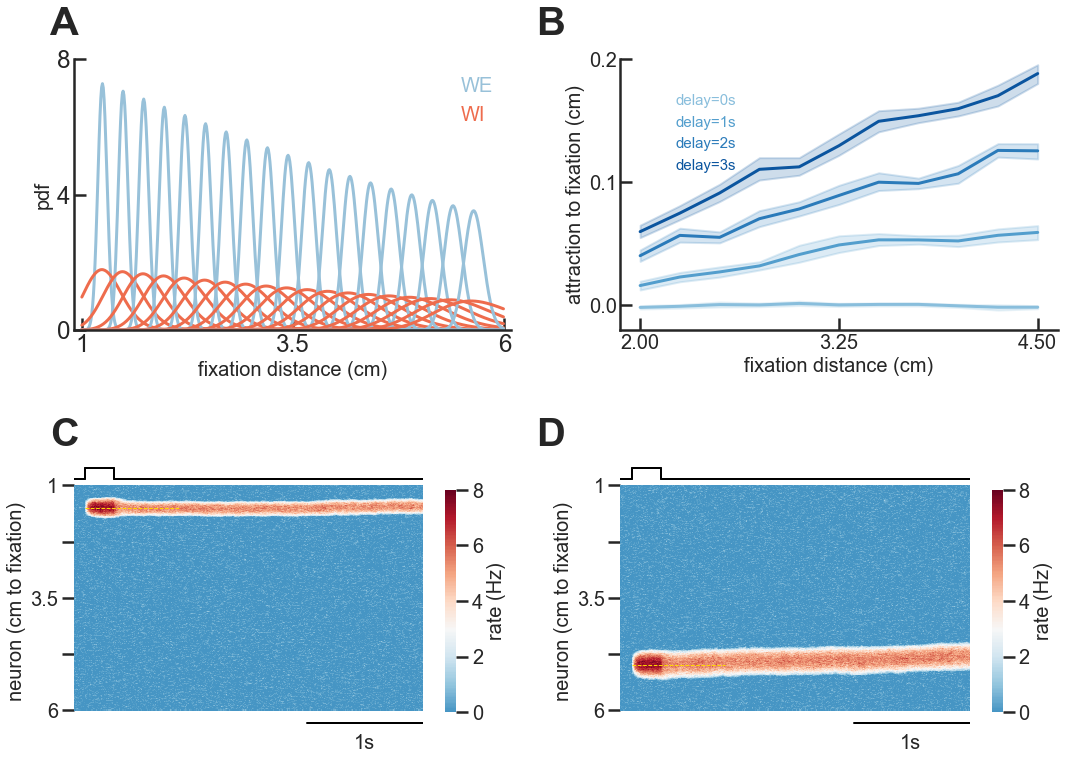

In [95]:
f = plt.figure(figsize=(15,10))

f.text(0.05, 1.02, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)
f.text(0.5, 1.02, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)

f.text(0.05, 0.45, "C", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)
f.text(0.5, 0.45, "D", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=40)




plt.subplot(221)

p_cols=['#98c1d9', '#ee6c4d' ]
for con_w in [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]:
    plt.plot(WE[con_w, :], p_cols[0])
    plt.plot(WI[con_w, :], p_cols[1])
plt.xlabel(r'fixation distance (cm)', fontsize=20);
plt.ylabel('pdf', fontsize=20)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.plot(WE[475, :], p_cols[0], label='WE')
plt.plot(WI[475, :], p_cols[1], label='WI')
plt.ylim(0,8)
plt.yticks([0,4,8])
plt.xlim(-10, 520)
plt.xticks([0, int(512/2), 512], [str(rint), str((rext+rint)/2), str(rext)])
l = plt.legend(loc=1, frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(['WE', 'WI']):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(p_cols[i_h]);



plt.subplot(222)

pal_ = sns.color_palette("Blues", n_colors=6)[2:] #sns.color_palette("Blues", n_colors=4)

sns.lineplot(x="position", y="interference", hue='delay_time', hue_order=[0, 1000, 2000, 3000],
             ci=95, palette=pal_, data=df_n)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              
plt.gca().spines['top'].set_visible(False)                                                                                  
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel(r'attraction to fixation (cm)', fontsize=20);
plt.xlabel(r'fixation distance (cm)', fontsize=20);
plt.ylim(-0.02,0.2);
plt.yticks([0, 0.1,0.2], fontsize=20);
#plt.xticks([2, 3.25, 4.5], ['close', 'middle', 'far'], fontsize=20);
plt.xticks([2, 3.25, 4.5], fontsize=20);

plt.gca().yaxis.set_tick_params(labelsize=20)

#plt.plot([60, 300], [0,0], 'k--', linewidth=1)

l =plt.legend(loc=2, frameon=False, prop={'size': 15}, ncol=1)

hue_order=['', 'delay=0s', 'delay=1s', 'delay=2s', 'delay=3s']
palette=['black', pal_[0], pal_[1], pal_[2], pal_[3]]

for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);


################################################################## heatmaps

ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

Res = [r1[3], r3[3]]
bars=[True, True]
axes=[ax3, ax4]
positions=[1.5,5]

for idx in [0,1]:
    ax=axes[idx]
    RE = Res[idx]
    time_simulation=3000
    position=positions[idx]
    target_onset=100
    pres_period=250
    bar_ = bars[idx]
    rext=6
    rint=1
    pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
    dims=np.shape(RE)
    dimN = dims[0]

    sns.heatmap(RE, cmap=pal_cyan, vmin=0, vmax=8,  cbar=bar_, 
                cbar_kws={"shrink": .82, 'ticks' : [0,2,4,6,8], 'label': 'rate (Hz)'}, ax=ax)
    ax.figure.axes[-1].yaxis.label.set_size(20)
    ax.figure.axes[-1].tick_params(labelsize=20)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('')
    p_stim = (position-rint) * dims[0]/(rext-rint)
    #
    stimon = target_onset/2
    stimoff = (target_onset + pres_period) / 2
    #
    ax.plot([stimon, stimon+400], [p_stim, p_stim], ls='--', color ='gold', linewidth=1) 
    #
    ax.set_xticks([])
    ax.set_xticklabels([])
    #
    ax.set_yticks([0, int(dimN/4), int(dimN/2),  int(3*dimN/4), int(dimN) ])
    ax.set_yticklabels([str(rint),'',str((rext+rint)/2), '', str(rext)], fontsize=20)
    #
    ax.set_xlabel('', fontsize=20);
    ax.set_ylabel('neuron (cm to fixation)', fontsize=20);
    ax.set_ylim(dimN+60, -45)
    ###
    ##line stims 
    s1on=stimon
    s1off=stimoff
    ax.plot([0, s1on], [-15, -15], 'k-', linewidth=2)
    ax.plot([s1on, s1on], [-15, -40], 'k-', linewidth=2)
    ax.plot([s1on, s1off], [-40, -40], 'k-', linewidth=2)
    ax.plot([s1off, s1off], [-15, -40], 'k-', linewidth=2)
    ax.plot([s1off, dims[1]], [-15, -15], 'k-', linewidth=2)
    #
    #time
    x1sec = 1000 * dims[1] / time_simulation
    ax.plot([dims[1]-x1sec, dims[1]], [dimN+30, dimN+30], 'k-', linewidth=2)
    ax.text(dims[1]-300, 600, '1s', fontsize=20);
    
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.5)

In [2]:
### Exploring the effect (fixed point, direction when we change the WE-WI balance)
from model_radial_linear_proves import *
%load_ext autoreload
%autoreload 2

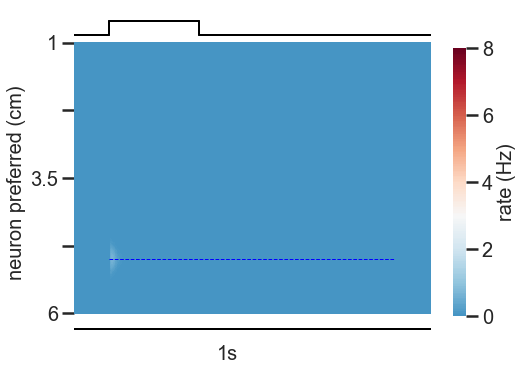

In [3]:
r3 = model_radial_linear_proves(totalTime=1000, targ_onset=100,  presentation_period=250, position=5, 
                         plot_connectivity=False, save_RE=True, 
                         NsigE=0., NsigI=0.,
                         ke2=2.4, ki2=1.6) 

simulation_heatmap_rad(r3[3], time_simulation=1000, position=5,  target_onset=100, pres_period=250)

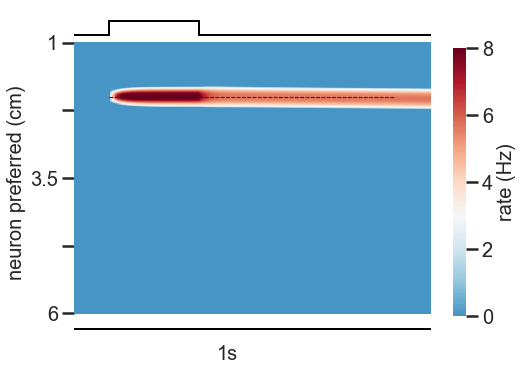

2 0.0 -0.042


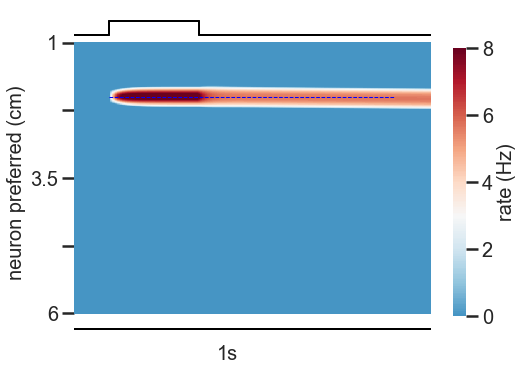

2 0.10416666666666667 -0.041


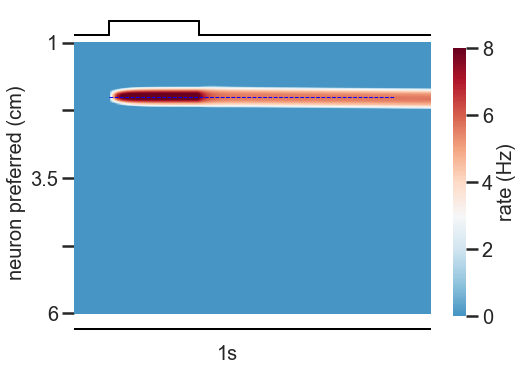

2 0.20833333333333334 -0.04


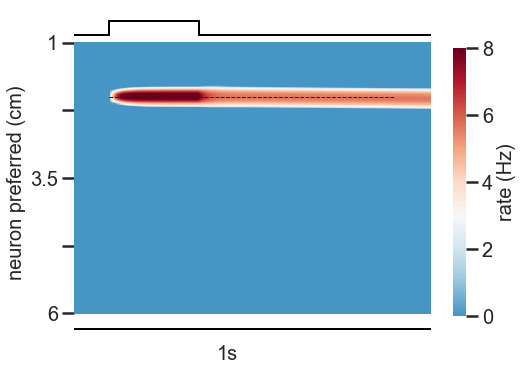

2 0.3125 -0.039


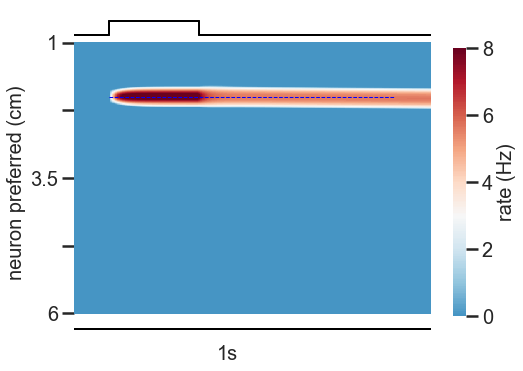

2 0.4166666666666667 -0.037


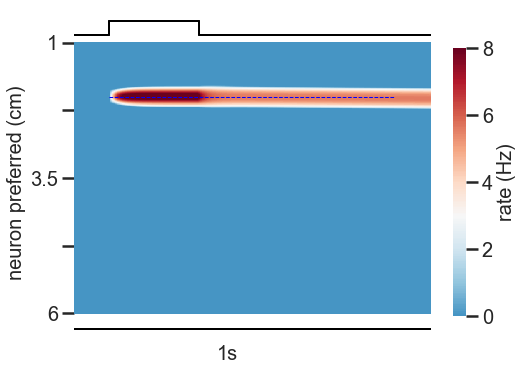

2 0.5208333333333334 -0.036


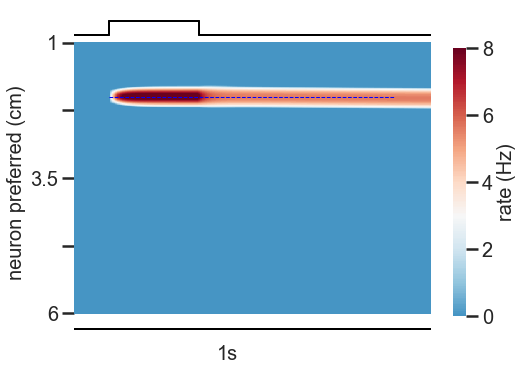

2 0.625 -0.034


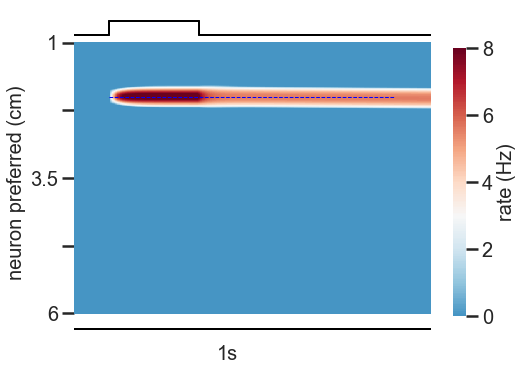

2 0.7291666666666667 -0.032


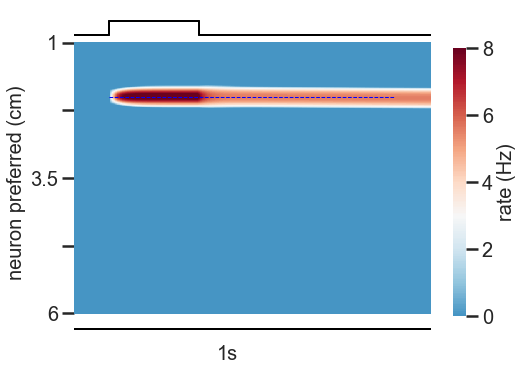

2 0.8333333333333334 -0.029


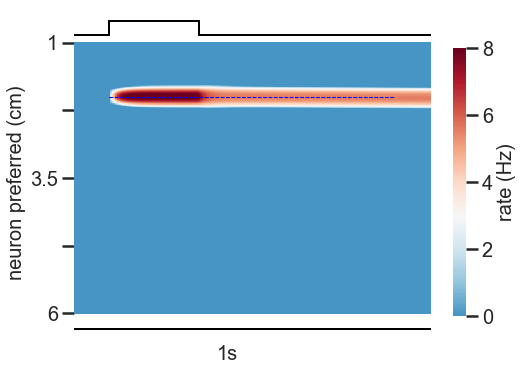

2 0.9375 -0.027


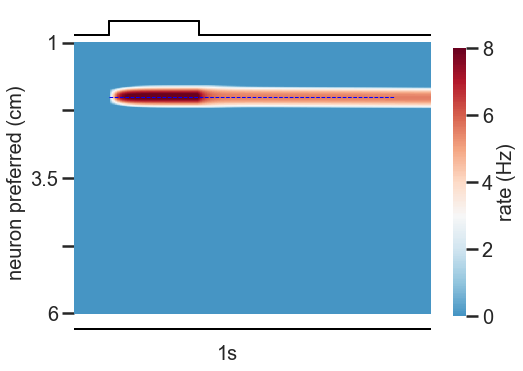

2 1.0416666666666667 -0.023


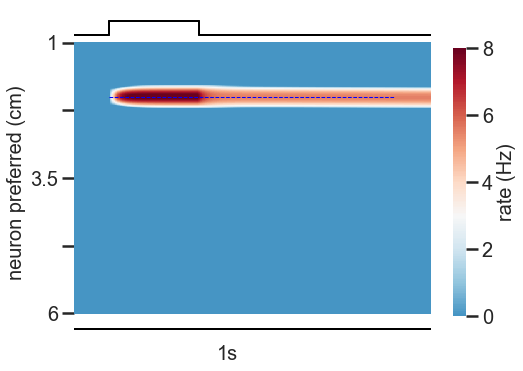

2 1.1458333333333335 -0.02


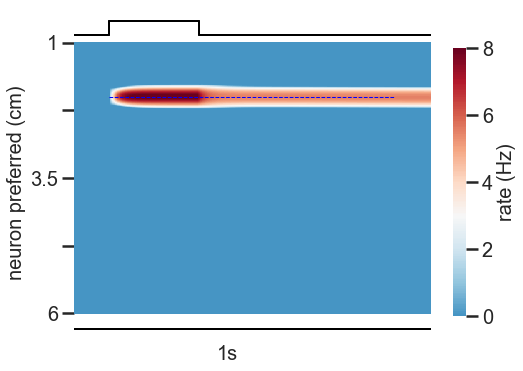

2 1.25 -0.016


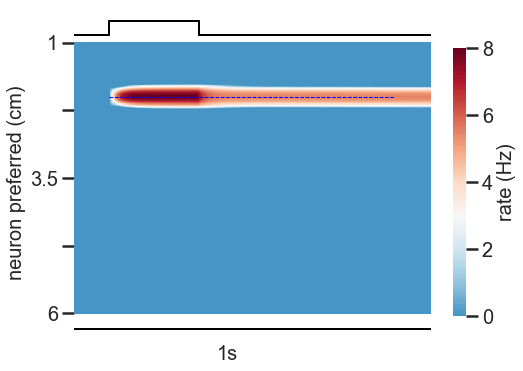

2 1.3541666666666667 -0.011


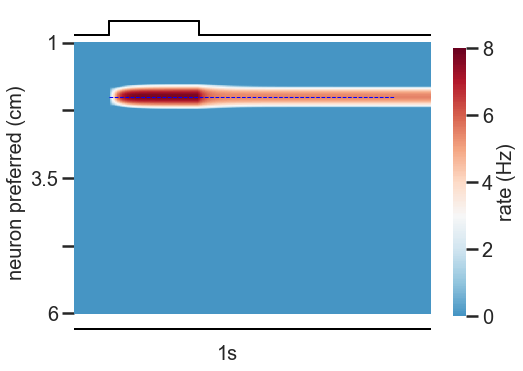

2 1.4583333333333335 -0.005


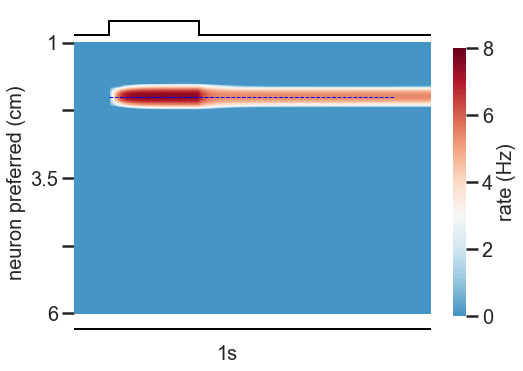

2 1.5625 0.0


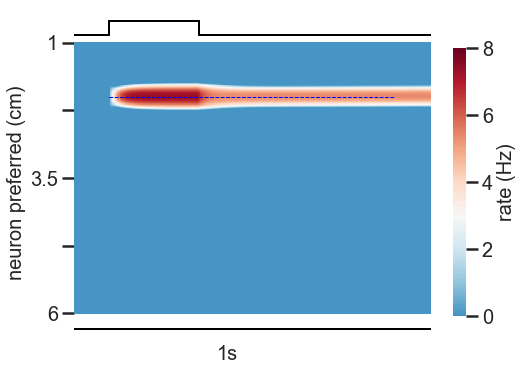

2 1.6666666666666667 0.008


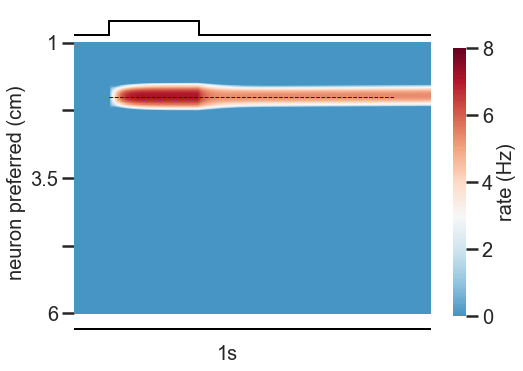

2 1.7708333333333335 0.016


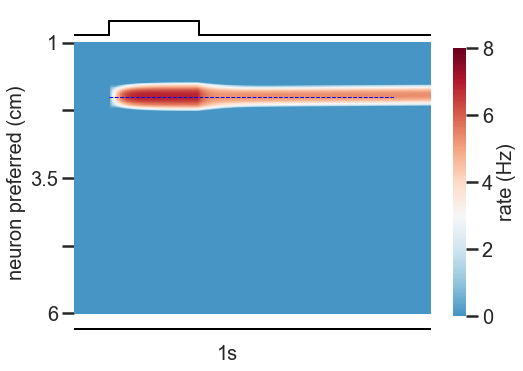

2 1.875 0.025


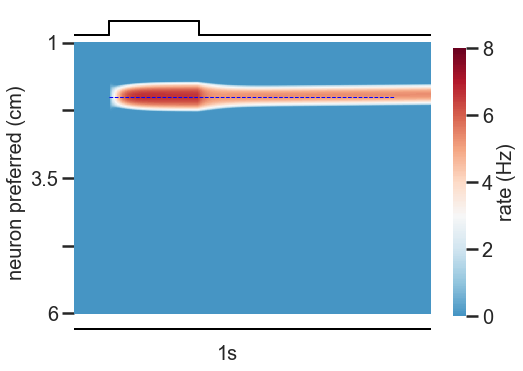

2 1.9791666666666667 0.035


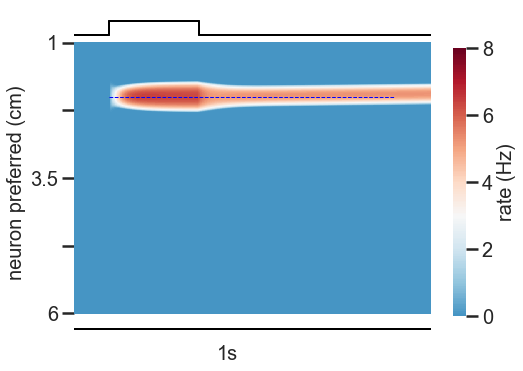

2 2.0833333333333335 0.048


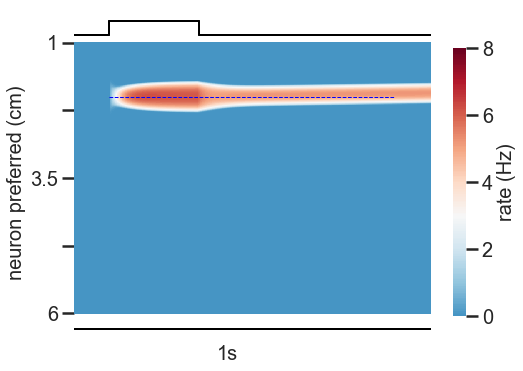

2 2.1875 0.062


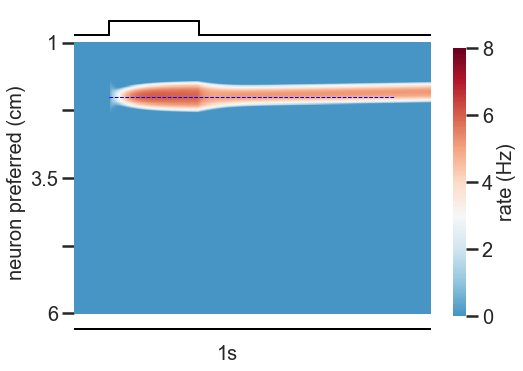

2 2.291666666666667 0.079


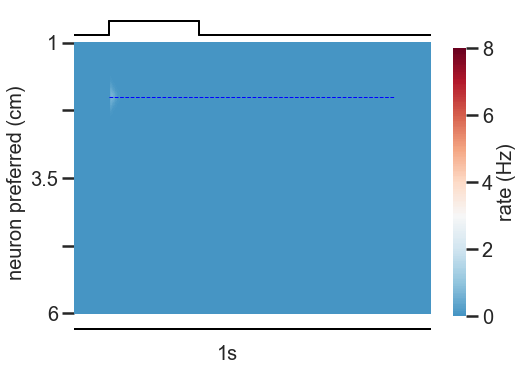

2 2.3958333333333335 1.0


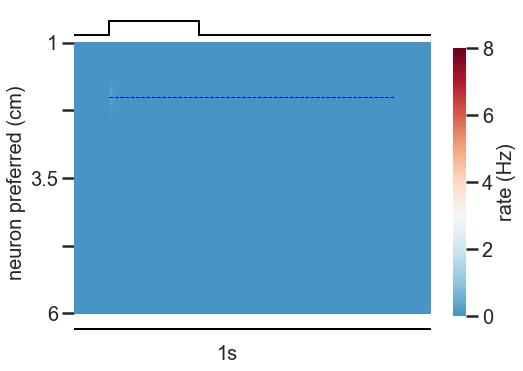

2 2.5 1.0


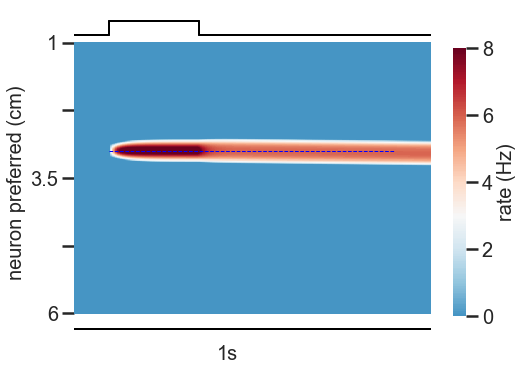

3 0.0 -0.05


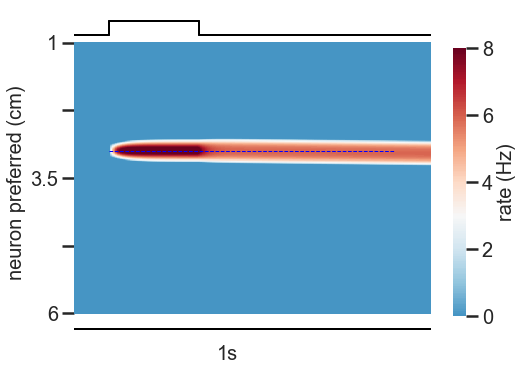

3 0.10416666666666667 -0.05


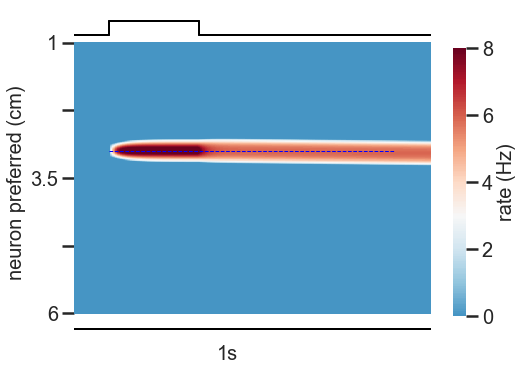

3 0.20833333333333334 -0.05


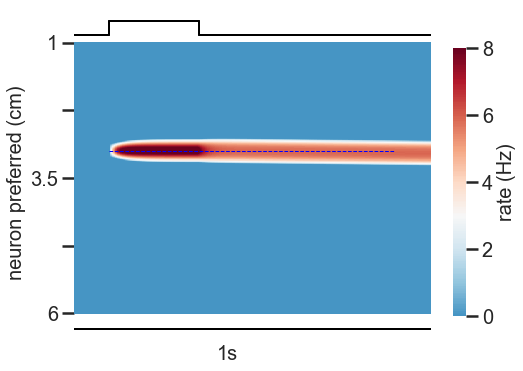

3 0.3125 -0.049


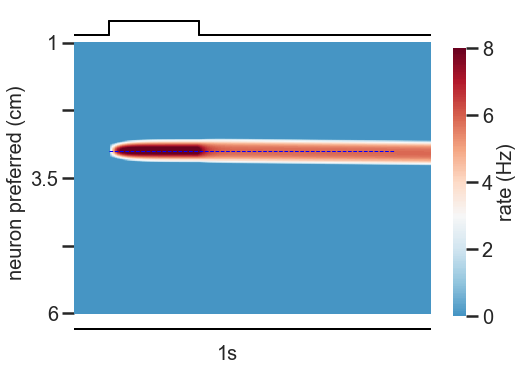

3 0.4166666666666667 -0.049


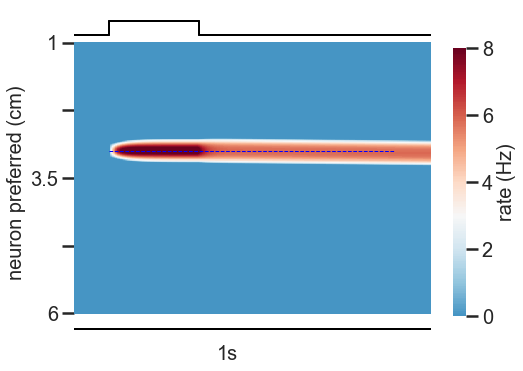

3 0.5208333333333334 -0.048


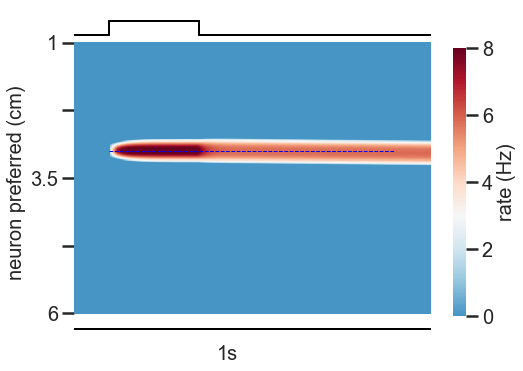

3 0.625 -0.046


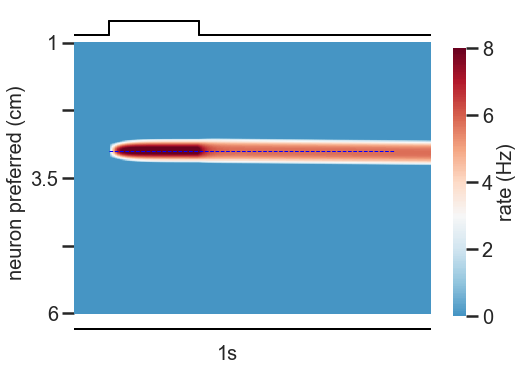

3 0.7291666666666667 -0.044


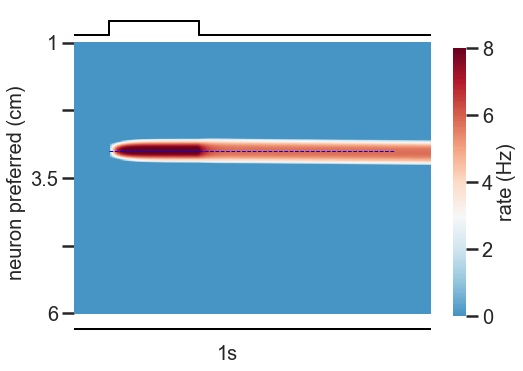

3 0.8333333333333334 -0.042


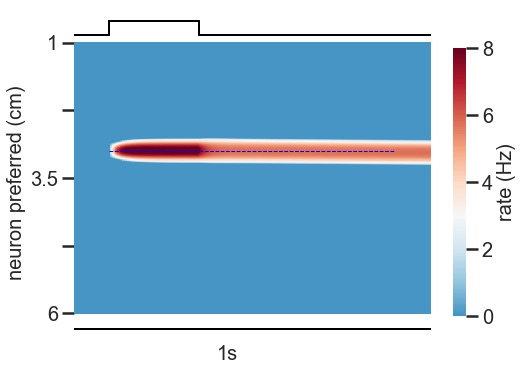

3 0.9375 -0.04


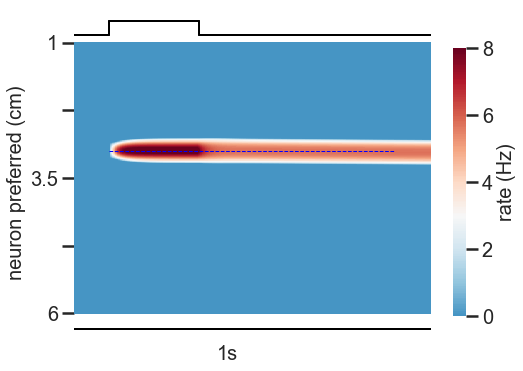

3 1.0416666666666667 -0.035


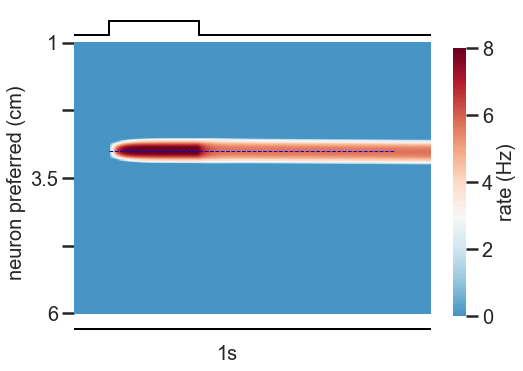

3 1.1458333333333335 -0.031


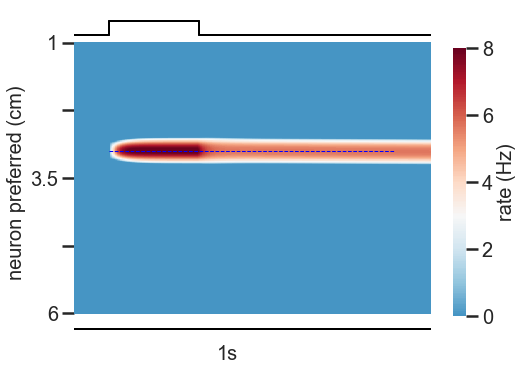

3 1.25 -0.025


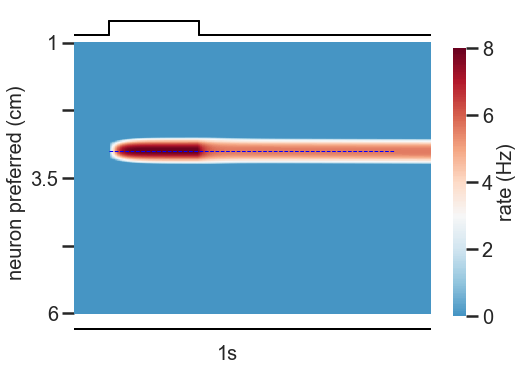

3 1.3541666666666667 -0.018


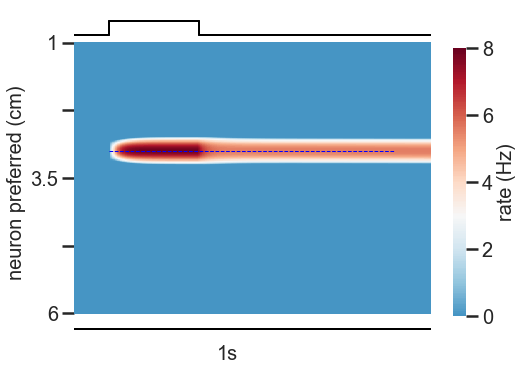

3 1.4583333333333335 -0.009


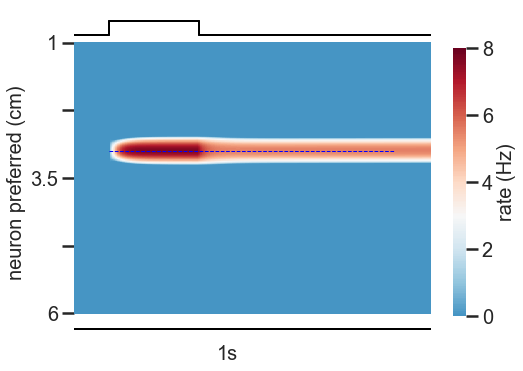

3 1.5625 0.002


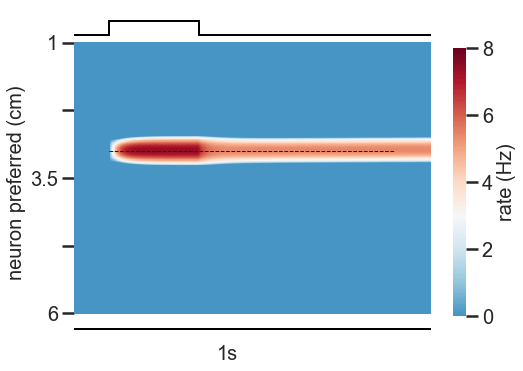

3 1.6666666666666667 0.016


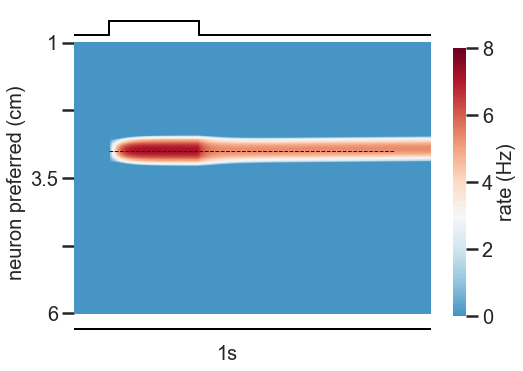

3 1.7708333333333335 0.034


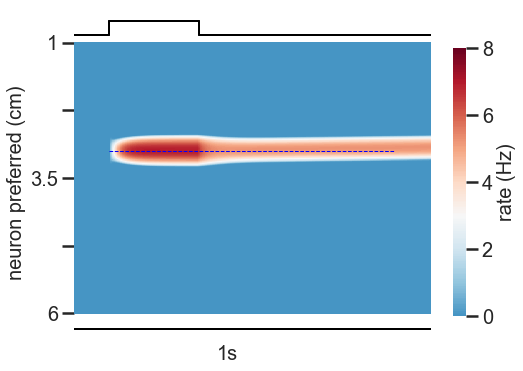

3 1.875 0.055


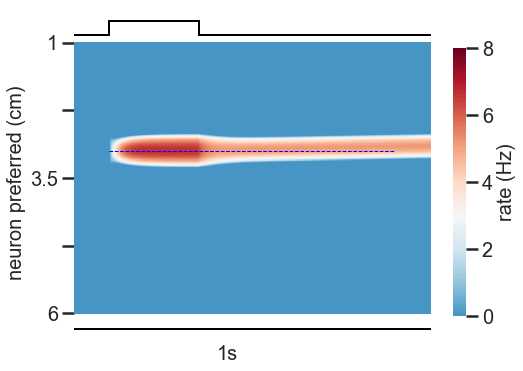

3 1.9791666666666667 0.082


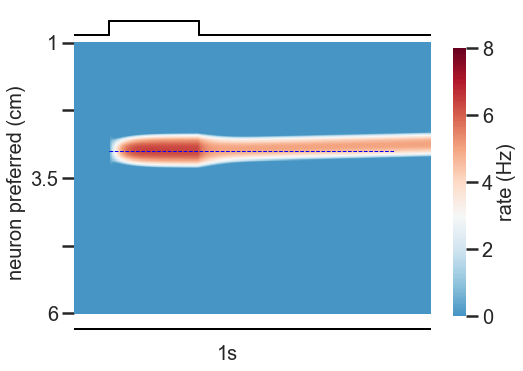

3 2.0833333333333335 0.115


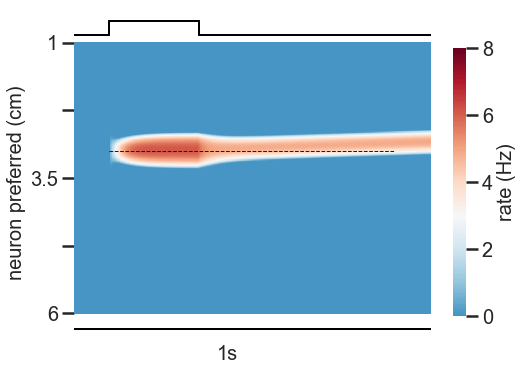

3 2.1875 0.155


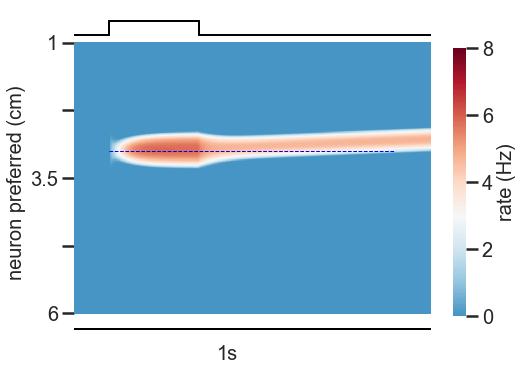

3 2.291666666666667 0.204


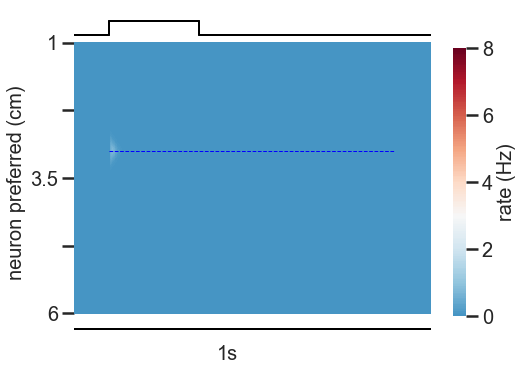

3 2.3958333333333335 2.0


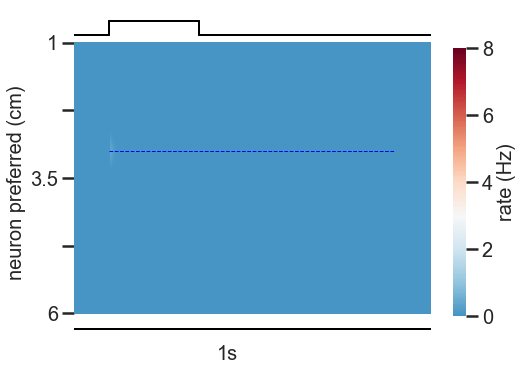

3 2.5 2.0


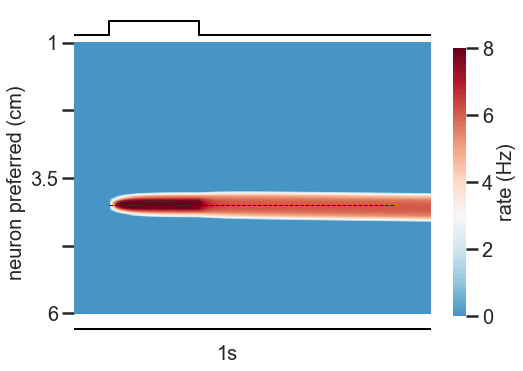

4 0.0 -0.057


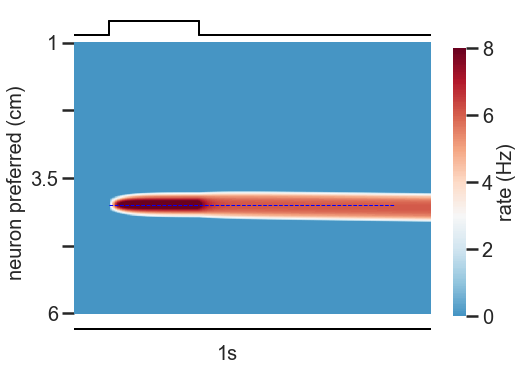

4 0.10416666666666667 -0.057


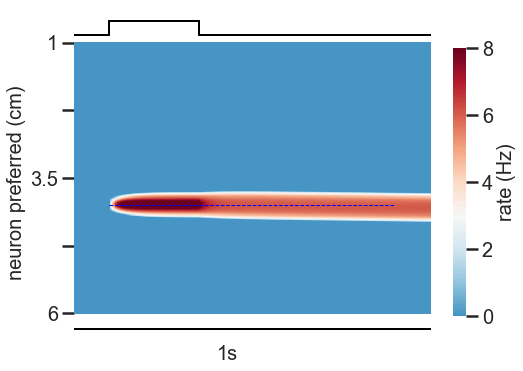

4 0.20833333333333334 -0.057


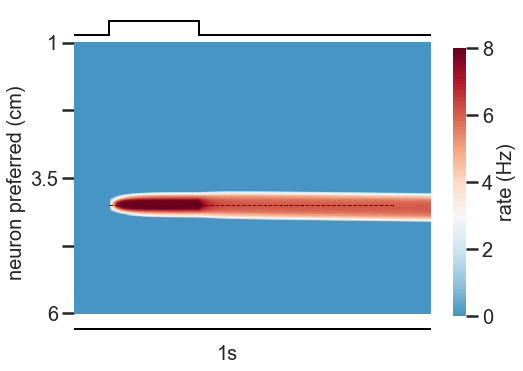

4 0.3125 -0.057


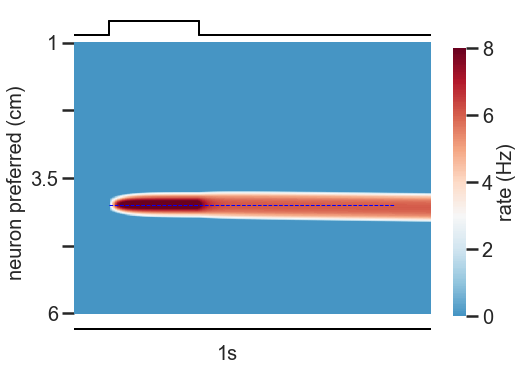

4 0.4166666666666667 -0.057


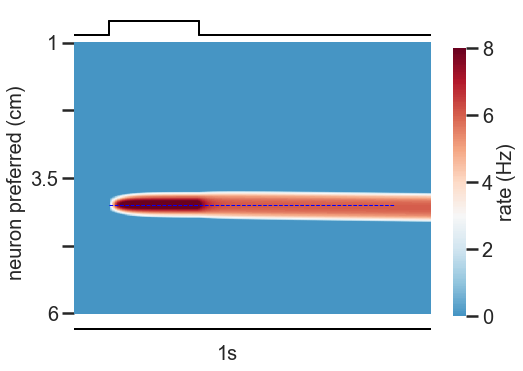

4 0.5208333333333334 -0.057


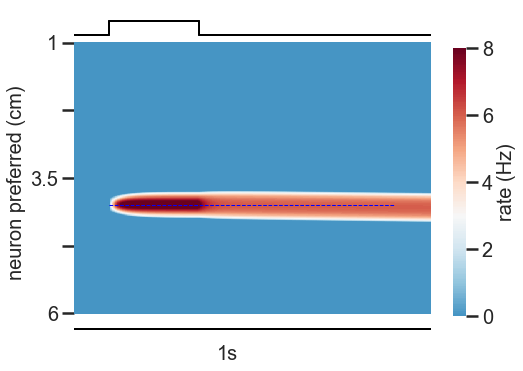

4 0.625 -0.056


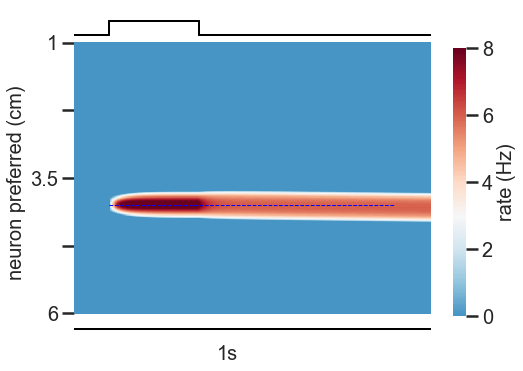

4 0.7291666666666667 -0.055


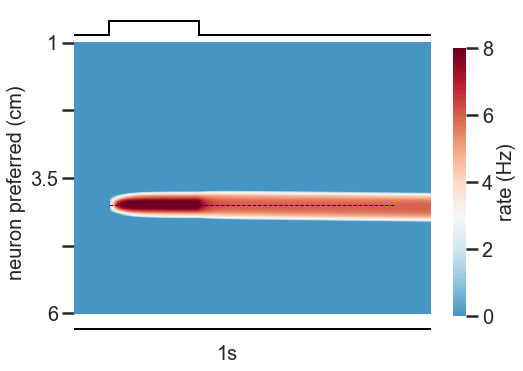

4 0.8333333333333334 -0.053


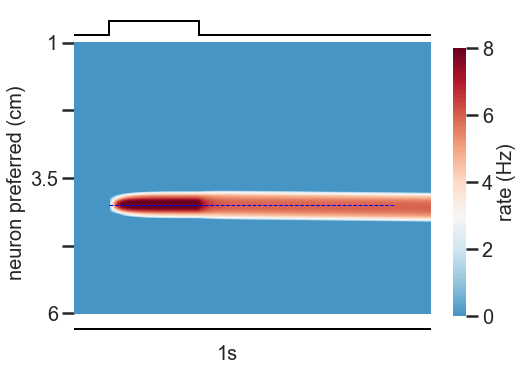

4 0.9375 -0.05


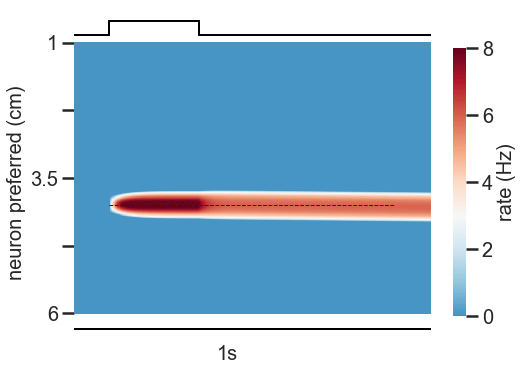

4 1.0416666666666667 -0.047


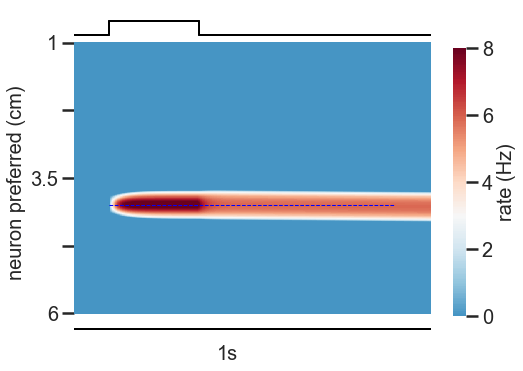

4 1.1458333333333335 -0.042


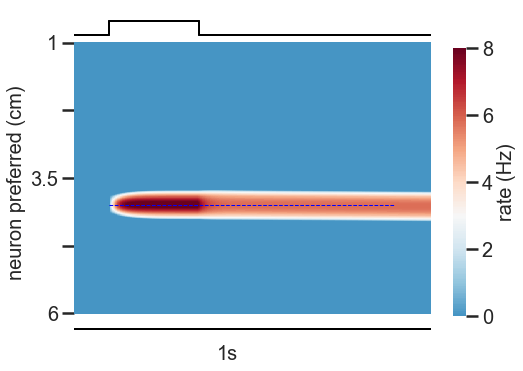

4 1.25 -0.035


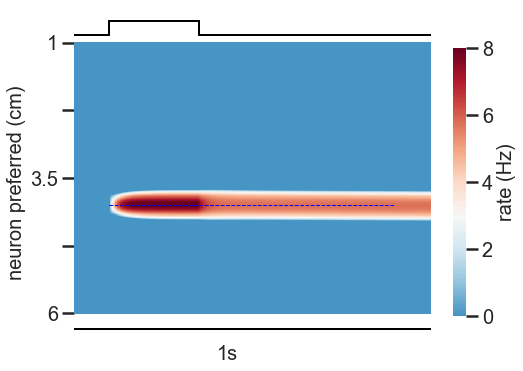

4 1.3541666666666667 -0.026


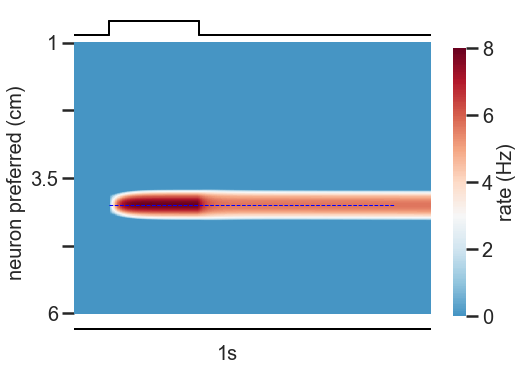

4 1.4583333333333335 -0.013


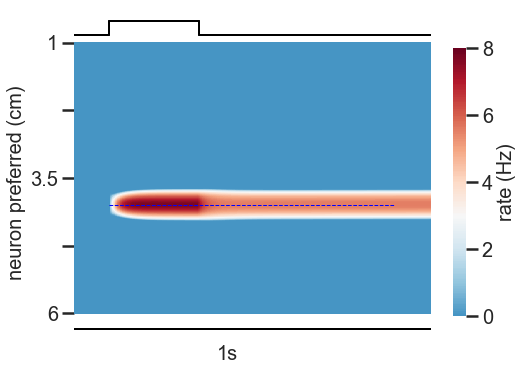

4 1.5625 0.004


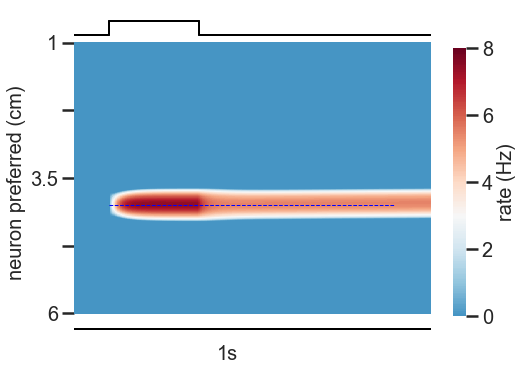

4 1.6666666666666667 0.027


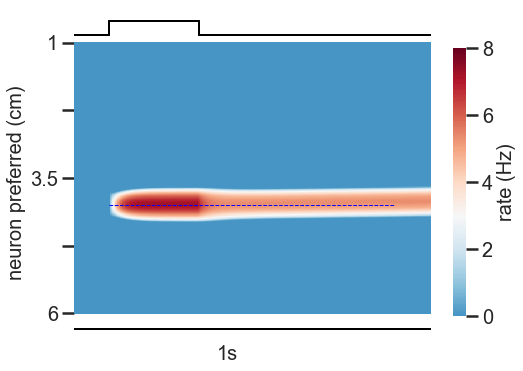

4 1.7708333333333335 0.057


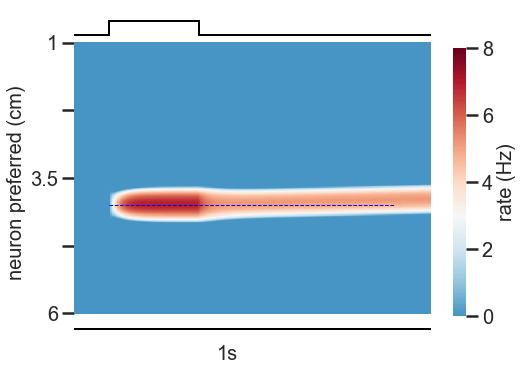

4 1.875 0.097


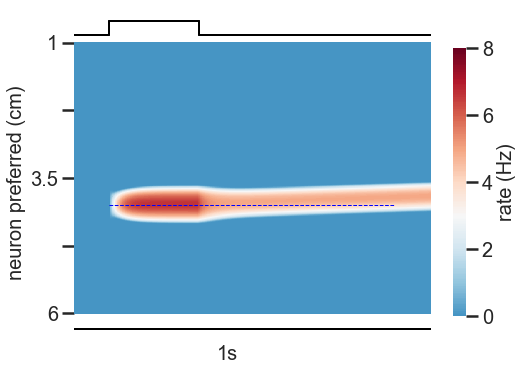

4 1.9791666666666667 0.149


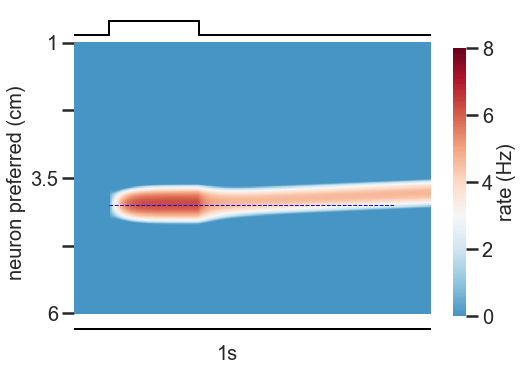

4 2.0833333333333335 0.214


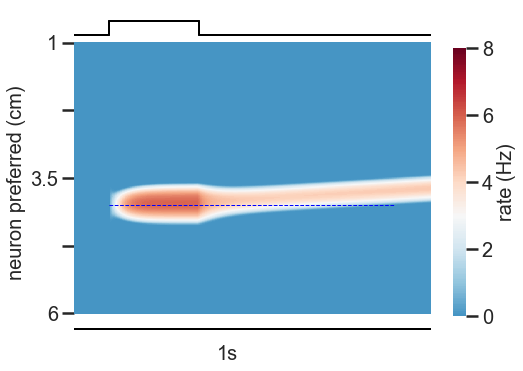

4 2.1875 0.292


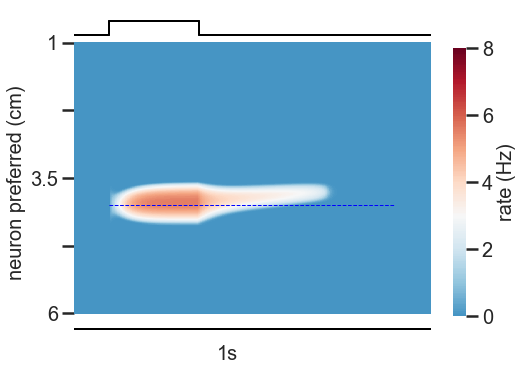

4 2.291666666666667 0.229


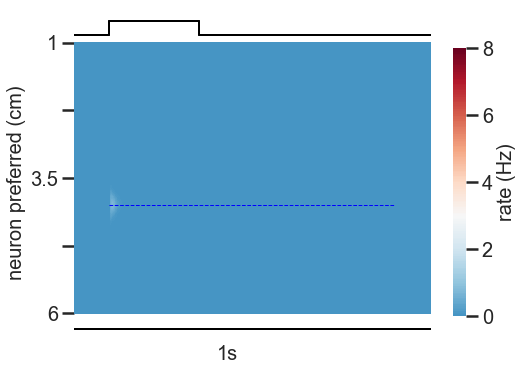

4 2.3958333333333335 -2.0


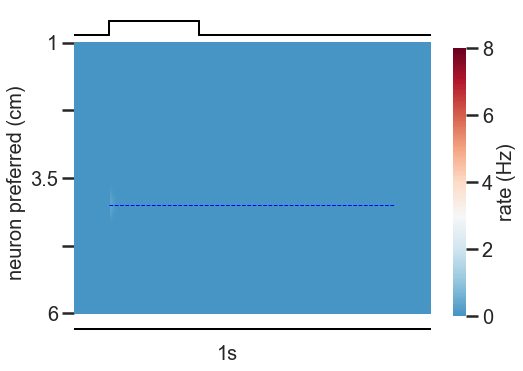

4 2.5 -2.0


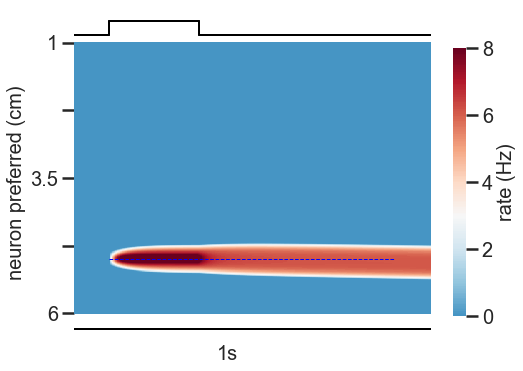

5 0.0 -0.073


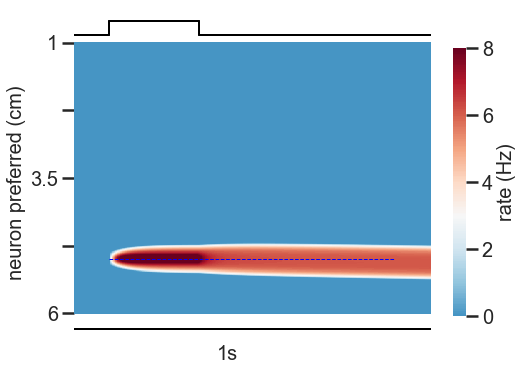

5 0.10416666666666667 -0.074


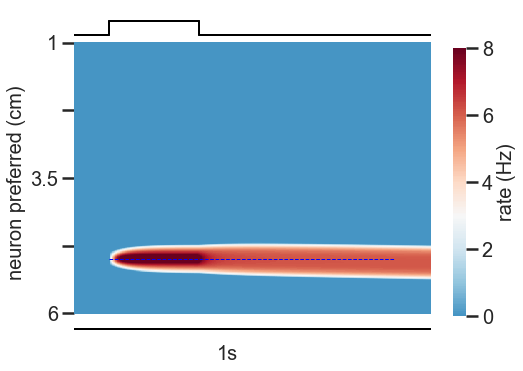

5 0.20833333333333334 -0.075


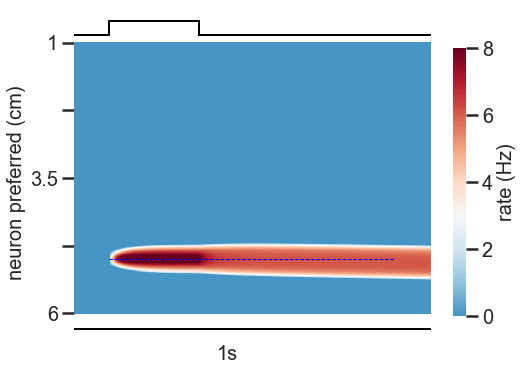

5 0.3125 -0.075


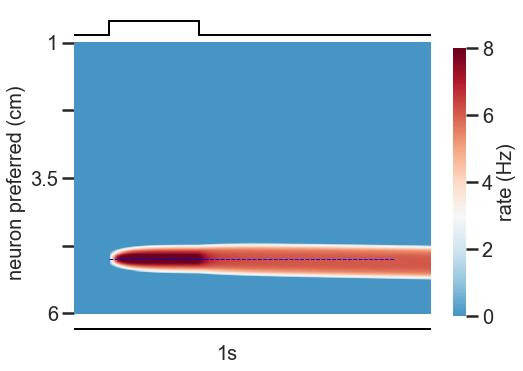

5 0.4166666666666667 -0.076


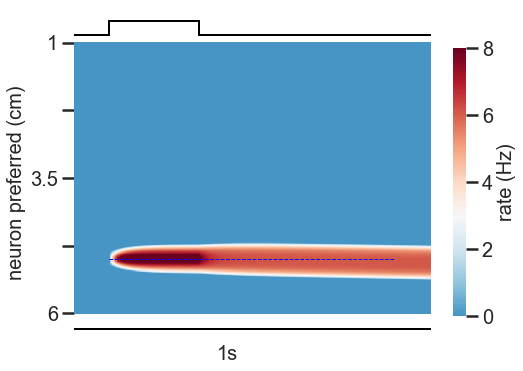

5 0.5208333333333334 -0.076


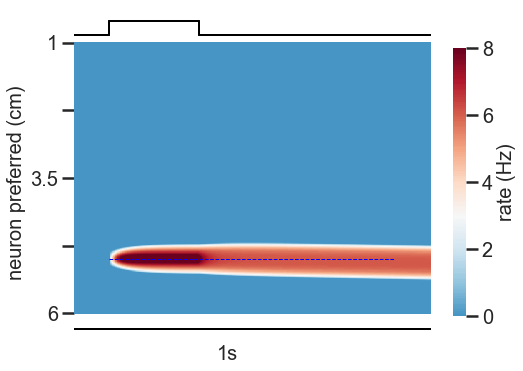

5 0.625 -0.076


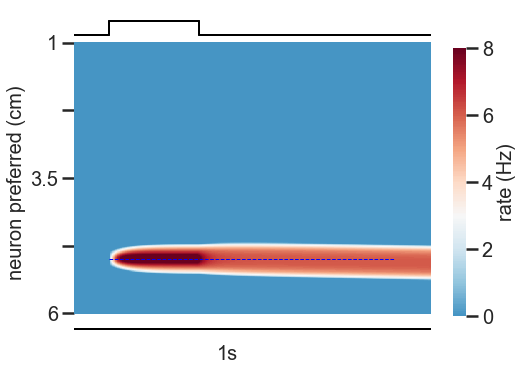

5 0.7291666666666667 -0.076


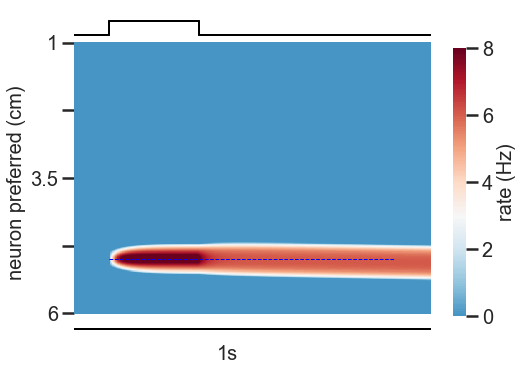

5 0.8333333333333334 -0.075


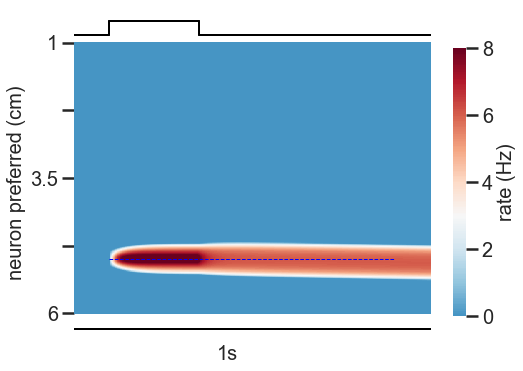

5 0.9375 -0.074


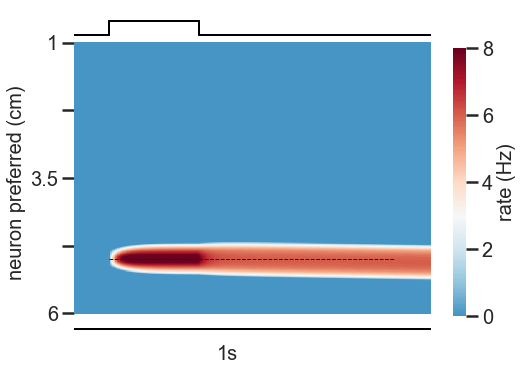

5 1.0416666666666667 -0.071


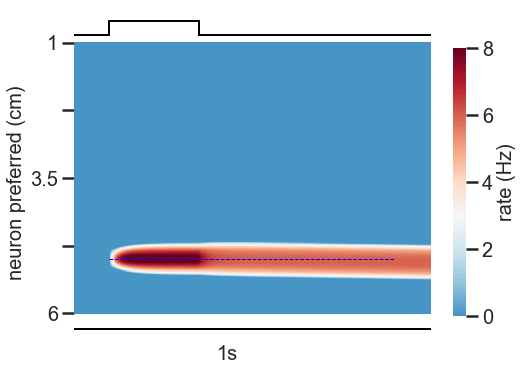

5 1.1458333333333335 -0.066


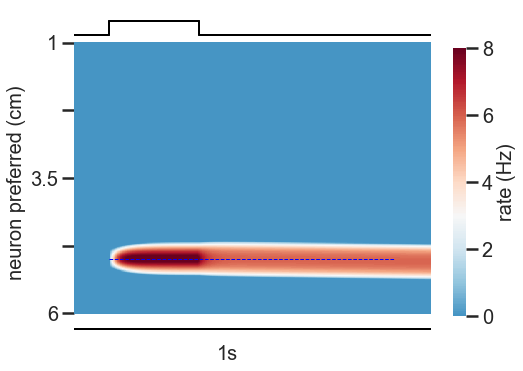

5 1.25 -0.059


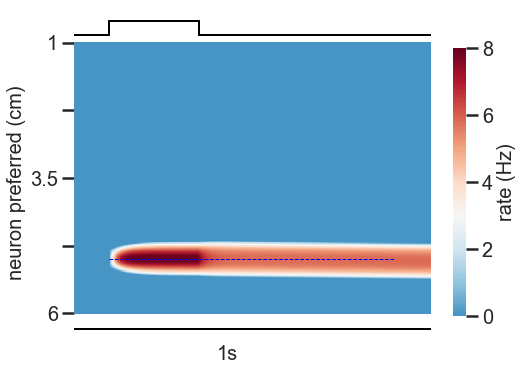

5 1.3541666666666667 -0.049


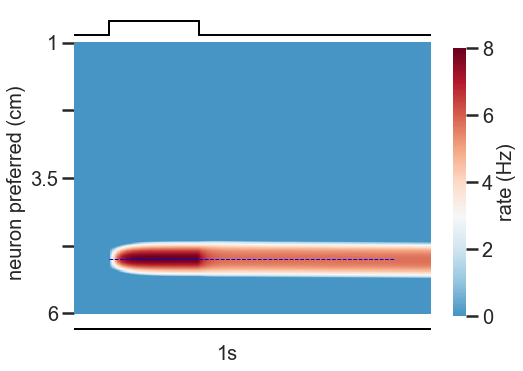

5 1.4583333333333335 -0.033


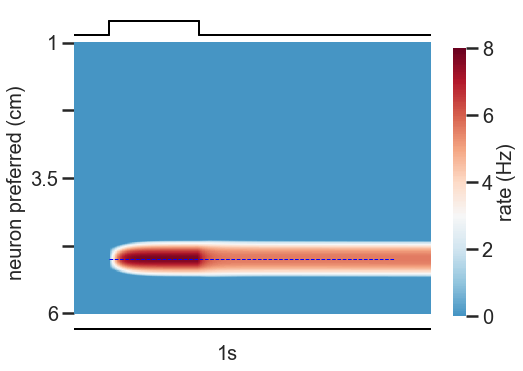

5 1.5625 -0.01


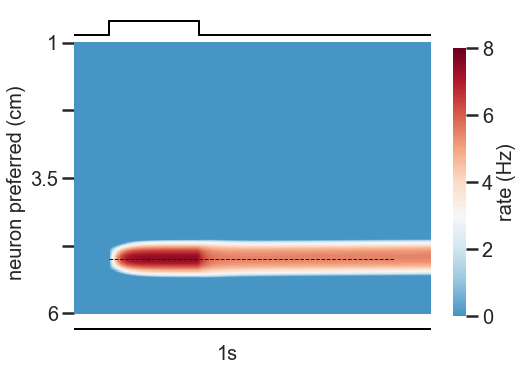

5 1.6666666666666667 0.024


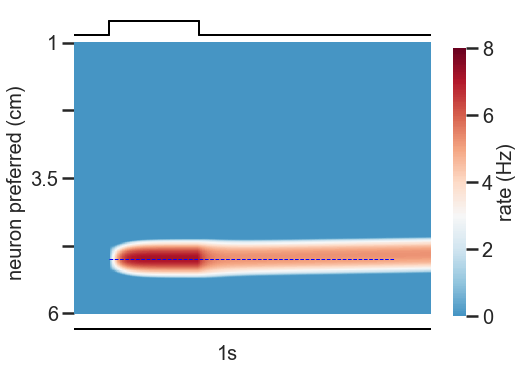

5 1.7708333333333335 0.072


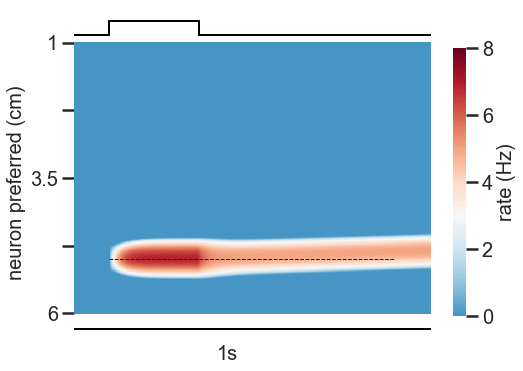

5 1.875 0.137


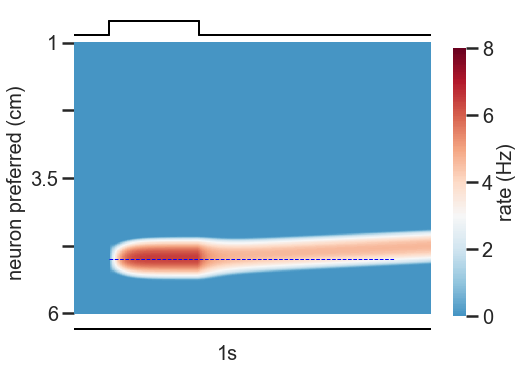

5 1.9791666666666667 0.225


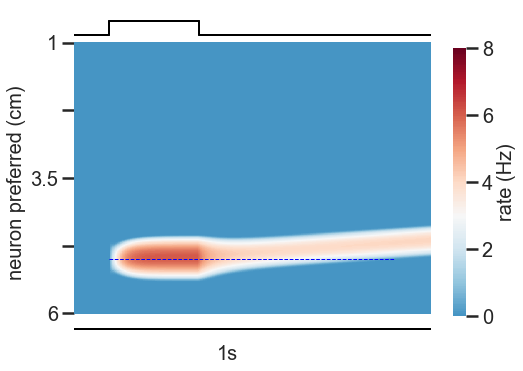

5 2.0833333333333335 0.331


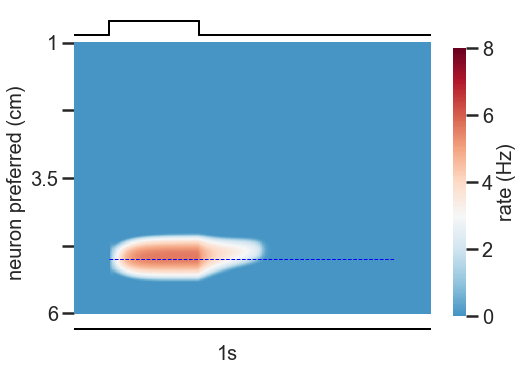

5 2.1875 0.151


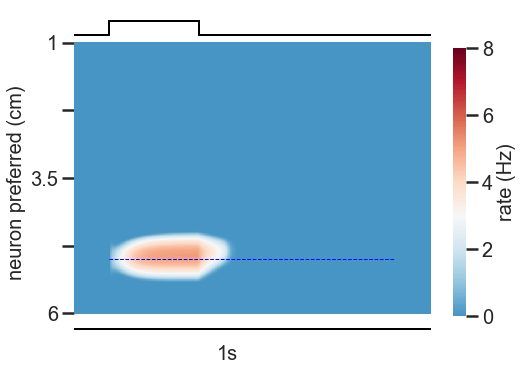

5 2.291666666666667 0.129


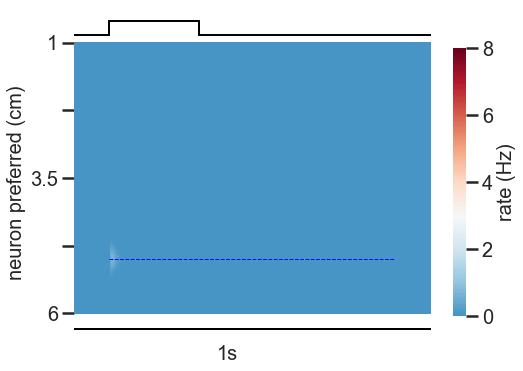

5 2.3958333333333335 -0.014


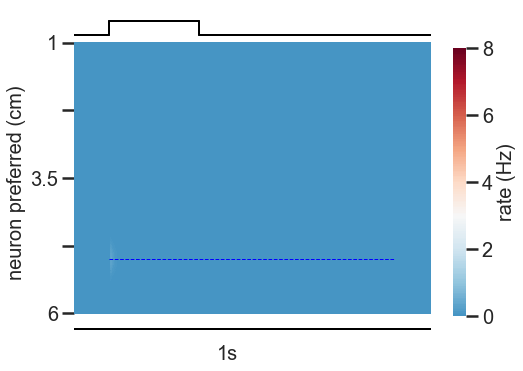

5 2.5 -0.008


In [5]:

drifts=[]
posis=[]
Kxs=[]

for p in [2,3,4,5]:
    for kx in np.linspace(0.,2.5, 25):
        r3 = model_radial_linear_proves(totalTime=1000, targ_onset=100,  presentation_period=250, position=p, 
                                 plot_connectivity=False, save_RE=True, 
                                 NsigE=0., NsigI=0.,
                                 ke2=kx, ki2=1.6) 

        simulation_heatmap_rad(r3[3], time_simulation=1000, position=p,  target_onset=100, pres_period=250)
        print(p,kx, r3[0])
        drifts.append(r3[0])
        #SEs.append(r3[6])
        #SIs.append(r3[7])
        posis.append(p)
        Kxs.append(kx)

In [20]:
Df = pd.DataFrame({'drift':drifts, 'exps': Kxs, 'eccent.':posis})

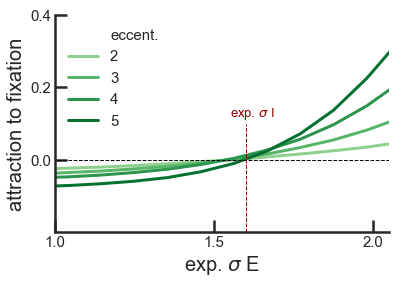

In [59]:
pal_ = sns.color_palette("Greens", n_colors=6)[2:] #sns.color_palette("Blues", n_colors=4)

sns.lineplot(x='exps', y='drift', hue='eccent.', data=Df, palette=pal_)
plt.plot([1.6, 1.6], [-0.2, 0.1], color='darkred', linestyle='--', linewidth=1)
plt.text(x=1.55, y=0.12, s=r'exp. $\sigma$ I', color='darkred', fontsize=13)

plt.plot([0, 2.5], [0,0], 'k--', linewidth=1)

plt.xlabel( r'exp. $\sigma$ E', fontsize=20)
plt.ylabel('attraction to fixation', fontsize=20)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlim(1., 2.05)
plt.ylim(-0.2,0.4)
plt.yticks([0,0.2,0.4], fontsize=15)
plt.xticks([1,1.5,2], fontsize=15)
#plt.title('pos:2')
plt.legend(loc=2,frameon=False, fontsize=15);

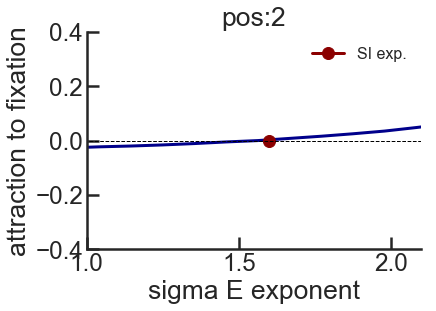

In [102]:
plt.plot(np.linspace(0.,2.5, 25), drifts, color='darkblue')
plt.plot([1.6], [0], color='darkred', marker='o', label='SI exp.')
plt.plot([0, 2.5], [0,0], 'k--', linewidth=1)
plt.xlabel('sigma E exponent')
plt.ylabel('attraction to fixation')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlim(1., 2.1)
plt.ylim(-0.4,0.4)
plt.title('pos:2')
plt.legend(frameon=False, fontsize=16)

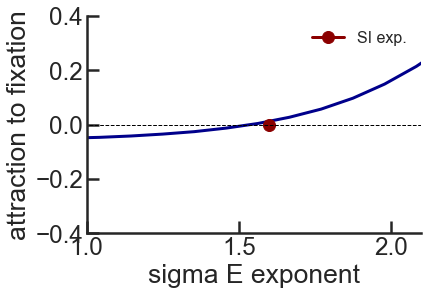

In [98]:
#### pos:4
plt.plot(np.linspace(0.,2.5, 25), drifts, color='darkblue')
plt.plot([1.6], [0], color='darkred', marker='o', label='SI exp.')
plt.plot([0, 2.5], [0,0], 'k--', linewidth=1)
plt.xlabel('sigma E exponent')
plt.ylabel('attraction to fixation')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlim(1., 2.1)
plt.ylim(-0.4,0.4)
plt.legend(frameon=False, fontsize=16)

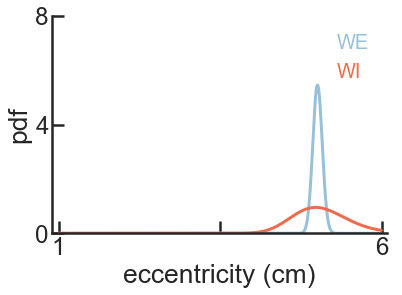

In [50]:
plt.figure()

rint=1
rext=6

p_cols=['#98c1d9', '#ee6c4d' ]
plt.xlabel('eccentricity (cm)')
plt.ylabel('pdf')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.plot(r3[4][410, :], p_cols[0], label='WE')
plt.plot(r3[5][410, :], p_cols[1], label='WI')
plt.ylim(0,8)
plt.yticks([0,4,8])
plt.xlim(-10, 520)
plt.xticks([0, int(512/2), 512], [str(rint), '', str(rext)])
l = plt.legend(loc=1, frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(['WE', 'WI']):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(p_cols[i_h]);
#
plt.show(block=False)

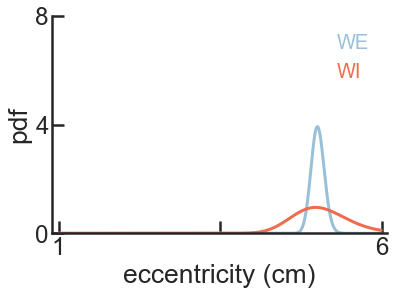

In [32]:
plt.figure()

rint=1
rext=6

p_cols=['#98c1d9', '#ee6c4d' ]
plt.xlabel('eccentricity (cm)')
plt.ylabel('pdf')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.plot(r3[4][410, :], p_cols[0], label='WE')
plt.plot(r3[5][410, :], p_cols[1], label='WI')
plt.ylim(0,8)
plt.yticks([0,4,8])
plt.xlim(-10, 520)
plt.xticks([0, int(512/2), 512], [str(rint), '', str(rext)])
l = plt.legend(loc=1, frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(['WE', 'WI']):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(p_cols[i_h]);
#
plt.show(block=False)

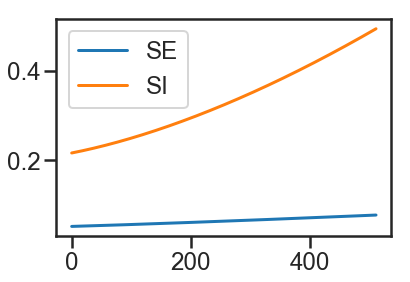

In [51]:
plt.plot(r3[6], label='SE')
plt.plot(r3[7], label='SI')
plt.legend()

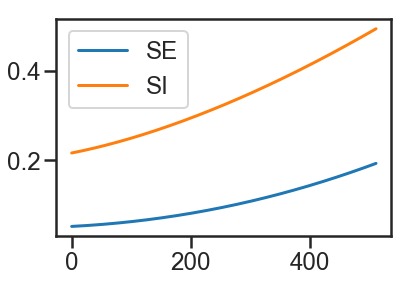

In [48]:
plt.plot(r3[6], label='SE')
plt.plot(r3[7], label='SI')
plt.legend()

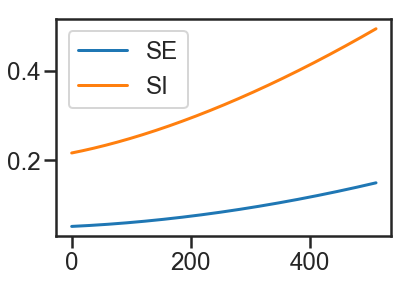

In [40]:
plt.plot(r3[6], label='SE')
plt.plot(r3[7], label='SI')
plt.legend()

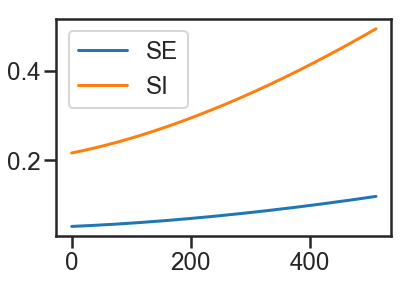

In [33]:
plt.plot(r3[6], label='SE')
plt.plot(r3[7], label='SI')
plt.legend()